###All practice is not created equal

Ander Ericcson orginally coined the term the 10,000 hours. The concept was born out of a study of 30 piano players who accumulated 10,000 in their pursuit of expert performance. The concept is it takes 10,000 hours of "deliberate practice" to achieve master in an given field. This concept was later adopted by Malcolm Gladwell in the New York Times best seller "Outlier: The story of success". After much criticism over the simpilistic of the rule a new study was published to replicate the orginal study to confirm there is a correlation in solo deliberatde practice and the current skill level of the performer.

The replication study ask Violinist at different levels of expertise how many hours they engaged in solo practice and teacher guided practice. This project will explore similities and difference in practice type of different level of Violinist performance.





This study sought to replicate the orginal 10,000 hours study that showed a correlation between deliberate study hours and expert performance.

Website: https://datadryad.org/stash/dataset/doi:10.5061/dryad.68db279

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read in the data file

In [100]:
df = pd.read_excel("violinist.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


The headers on some of the column were multi indexed. The syntax below set the header for the first two rows and combined the two rows into one row.

In [101]:
# Load the data
df = pd.read_excel("violinist.xlsx", header=[0, 1])

# Flatten the multi-index columns
df.columns = ['_'.join(map(str, filter(None, col))).strip() for col in df.columns.values]

df.rename(columns=column_rename_map, inplace=True)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


The first three rows respectively had their column names updated to Group, Age and Gender.

In [102]:
# Rename the columns
df.rename(columns={
    'Unnamed: 0_level_0_Group': 'group',
    'Unnamed: 1_level_0_Age': 'age',
    'Unnamed: 2_level_0_Gender': 'gender'
}, inplace=True)


In [103]:
df.head()

group   age gender  Age Began Practicing Violin  \
0  best  25.0      M                          5.0   
1  best  23.0      F                         10.0   
2  best  21.0      M                          4.0   
3  best  24.0      F                          5.0   
4  best  21.0      M                          3.0   

   Biographical Histories_Age Started Violin Lessons  \
0                                                6.0   
1                                               11.0   
2                                                4.0   
3                                                5.0   
4                                                3.0   

   Biographical Histories_Age Decided to Become Musician  \
0                                               11.0       
1                                               20.0       
2                                               20.0       
3                                               15.0       
4                                                9.0       

   Biographical Histories_Numbers of Violin Teachers  \
0                                                6.0   
1                                                6.0   
2                                                4.0   
3                                                4.0   
4                                                5.0   

   Biographical Histories_Number of Other Instruments  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Biographical Histories_Years Practicing  \
0                                     20.0   
1                                     13.0   
2                                     17.0   
3                                     19.0   
4                                     18.0   

   Biographical Histories_Number of Competitions  \
0                                           10.0   
1                                            5.0   
2                                            8.0   
3                                           16.0   
4                                            9.0   

  Biographical Histories_Minutes Memorized  \
0                                      330   
1                                       45   
2                                      300   
3                                       45   
4                                    640.2   

   Biographical Histories_Years by age 21  \
0                                    16.0   
1                                    11.0   
2                                    17.0   
3                                    16.0   
4                                    18.0   

   Biographical Histories_Years by age 23  \
0                                    18.0   
1                                    13.0   
2                                    19.0   
3                                    18.0   
4                                    20.0   

   Accumulated deliberate practice to age 18_Practice Alone  \
0                                            14664.0          
1                                             9984.0          
2                                             6760.0          
3                                             3978.0          
4                                             7852.0          

   Accumulated deliberate practice to age 18_Teacher-designed Practice  \
0                                            14352.0                     
1                                             7332.0                     
2                                             2719.6                     
3                                             5252.0                     
4                                             5096.0                     

   Retrospective Estimates of Weekly Hours of Practice Alone by Age_2  \

In [104]:
pd.set_option('display.max_columns', None)


In [105]:
df.head()

group   age gender  Age Began Practicing Violin  \
0  best  25.0      M                          5.0   
1  best  23.0      F                         10.0   
2  best  21.0      M                          4.0   
3  best  24.0      F                          5.0   
4  best  21.0      M                          3.0   

   Biographical Histories_Age Started Violin Lessons  \
0                                                6.0   
1                                               11.0   
2                                                4.0   
3                                                5.0   
4                                                3.0   

   Biographical Histories_Age Decided to Become Musician  \
0                                               11.0       
1                                               20.0       
2                                               20.0       
3                                               15.0       
4                                                9.0       

   Biographical Histories_Numbers of Violin Teachers  \
0                                                6.0   
1                                                6.0   
2                                                4.0   
3                                                4.0   
4                                                5.0   

   Biographical Histories_Number of Other Instruments  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Biographical Histories_Years Practicing  \
0                                     20.0   
1                                     13.0   
2                                     17.0   
3                                     19.0   
4                                     18.0   

   Biographical Histories_Number of Competitions  \
0                                           10.0   
1                                            5.0   
2                                            8.0   
3                                           16.0   
4                                            9.0   

  Biographical Histories_Minutes Memorized  \
0                                      330   
1                                       45   
2                                      300   
3                                       45   
4                                    640.2   

   Biographical Histories_Years by age 21  \
0                                    16.0   
1                                    11.0   
2                                    17.0   
3                                    16.0   
4                                    18.0   

   Biographical Histories_Years by age 23  \
0                                    18.0   
1                                    13.0   
2                                    19.0   
3                                    18.0   
4                                    20.0   

   Accumulated deliberate practice to age 18_Practice Alone  \
0                                            14664.0          
1                                             9984.0          
2                                             6760.0          
3                                             3978.0          
4                                             7852.0          

   Accumulated deliberate practice to age 18_Teacher-designed Practice  \
0                                            14352.0                     
1                                             7332.0                     
2                                             2719.6                     
3                                             5252.0                     
4                                             5096.0                     

   Retrospective Estimates of Weekly Hours of Practice Alone by Age_2  \

This limits the dataframe to the first 43 rows. The remanding rows are statistical analyst that we do not need.

In [106]:
df = df.iloc[:43]

In [107]:
df.head(50)

group   age gender  Age Began Practicing Violin  \
0                best  25.0      M                          5.0   
1                best  23.0      F                         10.0   
2                best  21.0      M                          4.0   
3                best  24.0      F                          5.0   
4                best  21.0      M                          3.0   
5                best  21.0      M                          6.0   
6                best  23.0      M                         11.0   
7                best  21.0      F                          2.0   
8                best  20.0      M                          5.0   
9                best  20.0      F                          9.0   
10               best  21.0      M                          4.0   
11               best  22.0      F                          4.0   
12               best  22.0      F                          3.0   
13               good  22.0      M                          4.0   
14               good  19.0      M                          8.0   
15               good  19.0      F                          4.0   
16               good  20.0      M                          3.0   
17               good  24.0      F                          9.0   
18               good  25.0      M                          7.0   
19               good  19.0      M                          6.0   
20               good  18.0      M                          5.0   
21               good  19.0      F                          2.0   
22               good  19.0      F                          3.0   
23               good  19.0      F                          4.0   
24               good  21.0      F                          4.0   
25               good  23.0      M                         10.0   
26  less accomplished  22.0      F                          4.0   
27  less accomplished  26.0      F                          6.0   
28  less accomplished  20.0      F                          5.0   
29  less accomplished  20.0      M                         10.0   
30  less accomplished  20.0      F                         10.0   
31  less accomplished  20.0      M                          3.0   
32  less accomplished  19.0      F                          4.0   
33  less accomplished  18.0      F                          5.0   
34  less accomplished  20.0      M                          5.0   
35  less accomplished  19.0      F                          5.0   
36  less accomplished  18.0      F                          8.0   
37  less accomplished  20.0      M                          5.0   
38  less accomplished  18.0      M                          5.0   
39       professional  46.0      F                          6.0   
40       professional  27.0      F                          5.0   
41       professional  54.0      M                          6.0   
42       professional  32.0      F                          3.0   

    Biographical Histories_Age Started Violin Lessons  \
0                                                 6.0   
1                                                11.0   
2                                                 4.0   
3                                                 5.0   
4                                                 3.0   
5                                                 6.0   
6                                                11.0   
7                                                 2.0   
8                                                 5.0   
9                                                 9.0   
10                                                4.0   
11                                                4.0   
12                                                3.0   
13                                                4.0   
14                                                8.0   
15                                                4.0   
16                                                3.0   
17                                       

In [108]:
pd.set_option('display.max_columns', None)


In [109]:
df.columns

Index(['group', 'age', 'gender', 'Age Began Practicing Violin',
       'Biographical Histories_Age Started Violin Lessons',
       'Biographical Histories_Age Decided to Become Musician',
       'Biographical Histories_Numbers of Violin Teachers',
       'Biographical Histories_Number of Other Instruments',
       'Biographical Histories_Years Practicing',
       'Biographical Histories_Number of Competitions',
       ...
       'Awareness of Concepts/Terms_"10,000-hour rule"',
       'Beliefs_"10,000-hour rule"', 'Beliefs_Self: Nature',
       'Beliefs_Self: Nurture', 'Beliefs_Growth Mindset (Talent)',
       'Cognitive Abilities_Working Memory Capacity',
       'Cognitive Abilities_Fluid Intelligence',
       'Cognitive Abilities_Cognitive Processing Speed',
       'Cognitive Abilities_Basic Music Ability', 'Notes_See below'],
      dtype='object', length=502)

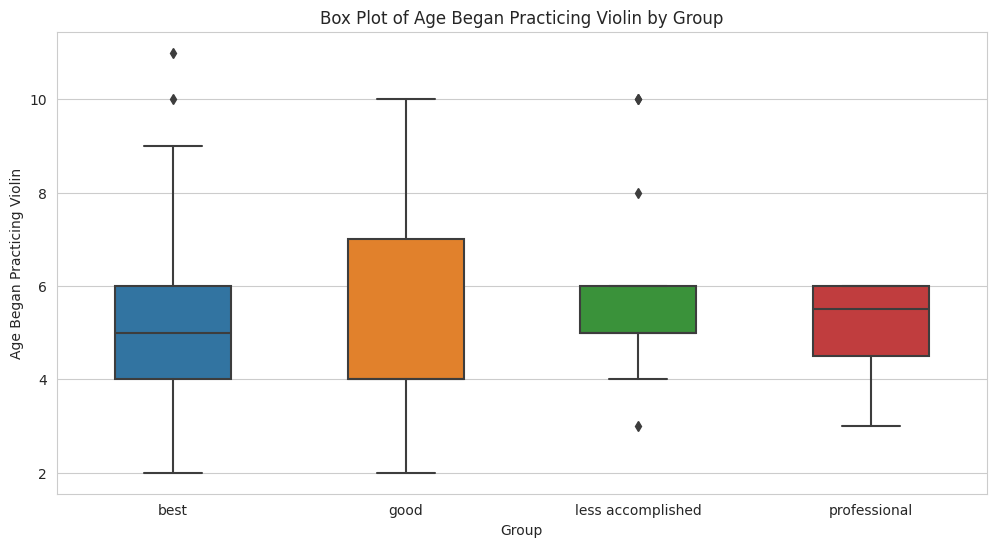

In [110]:
# Creating a box plot with seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='group', y='Age Began Practicing Violin', data=df, width=0.5)

# Adding labels and title
plt.xlabel('Group')
plt.ylabel('Age Began Practicing Violin')
plt.title('Box Plot of Age Began Practicing Violin by Group')

# Show plot
plt.show()


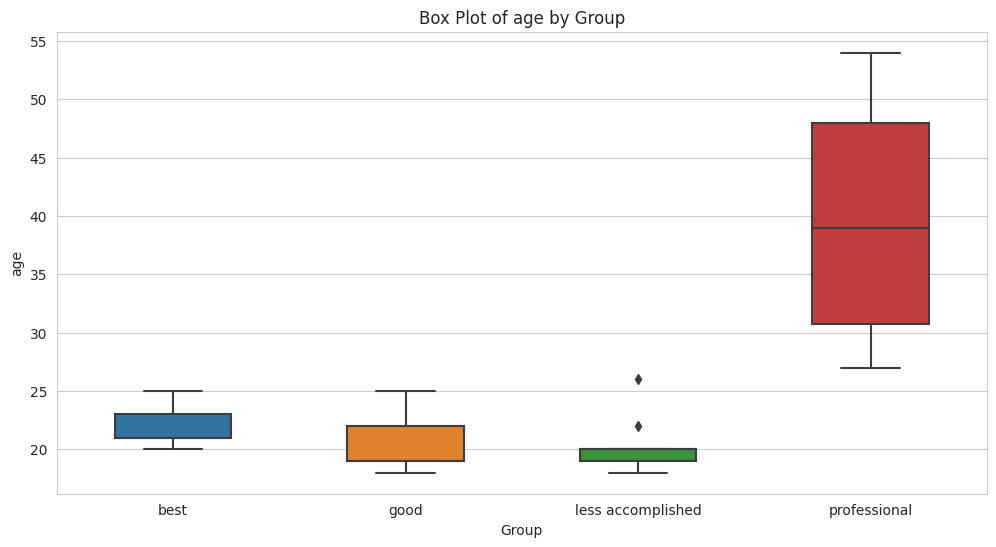

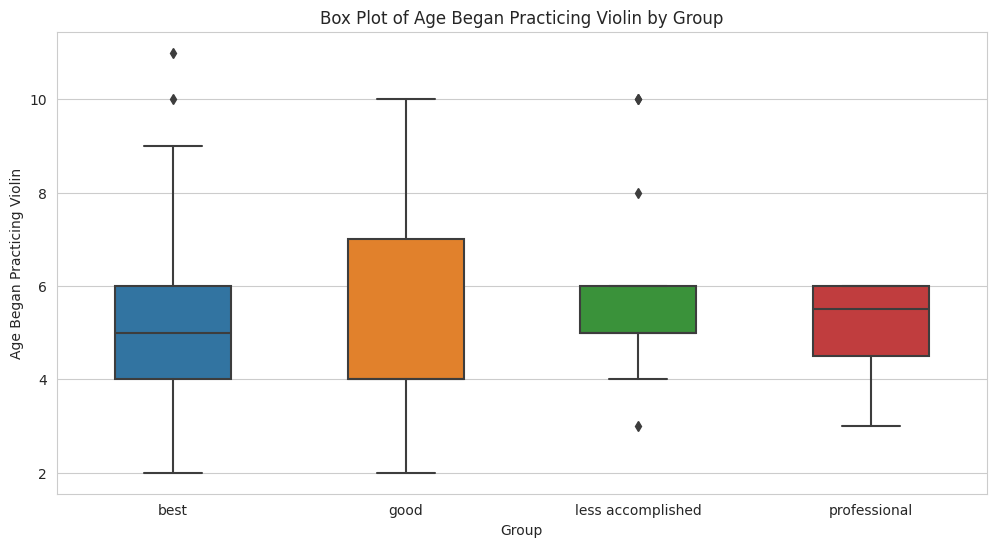

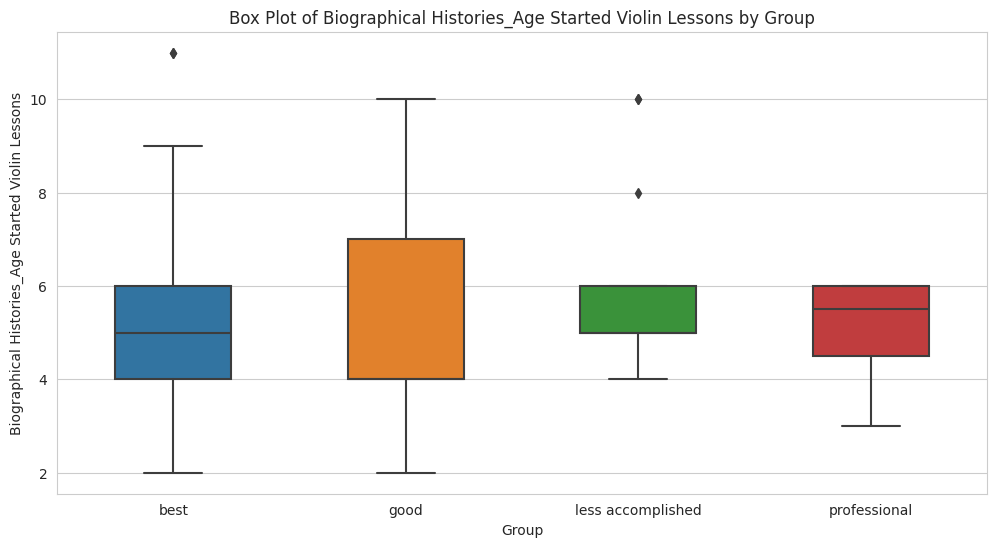

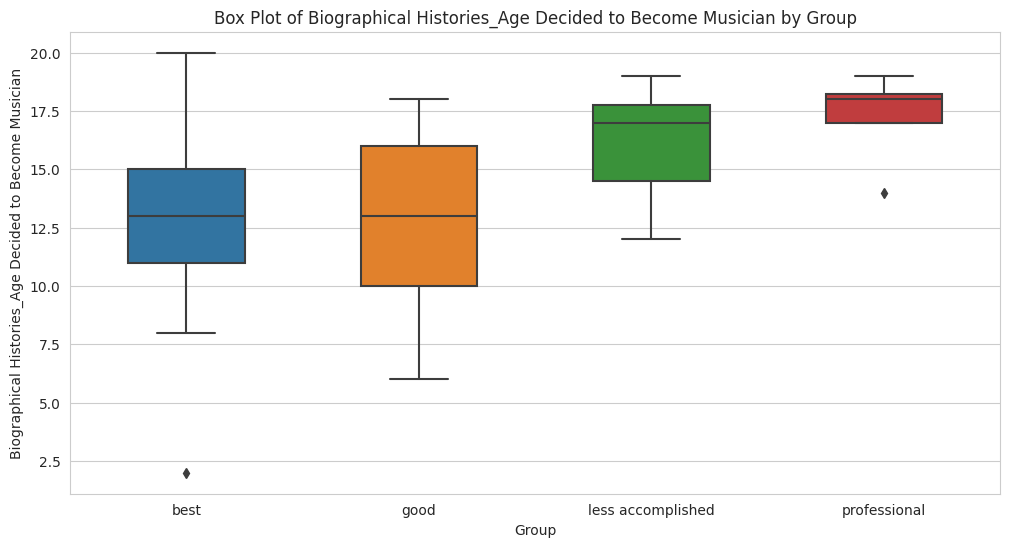

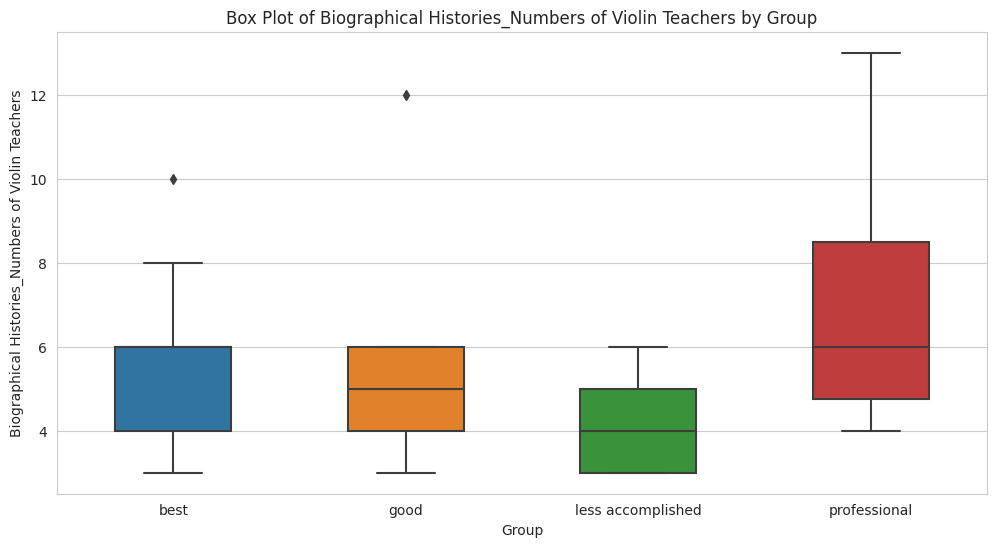

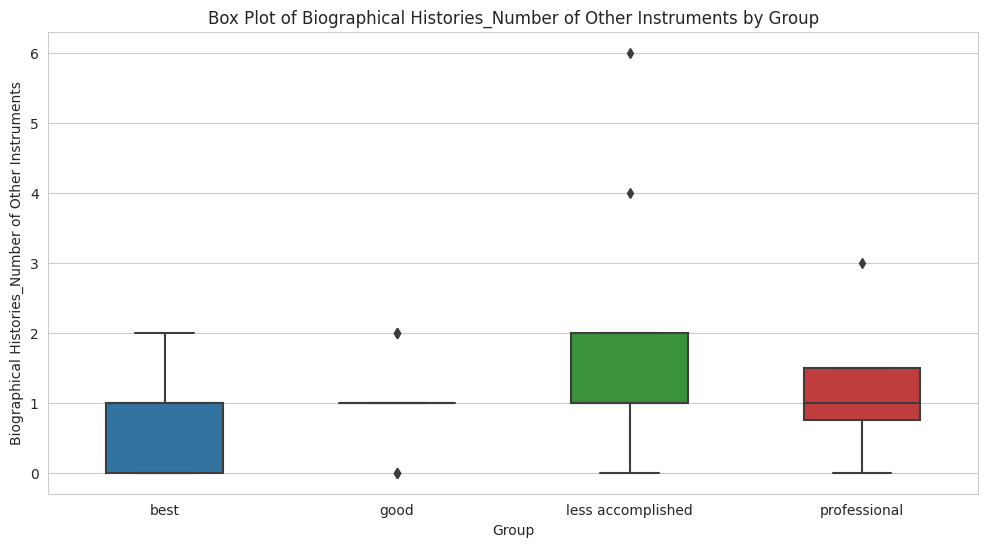

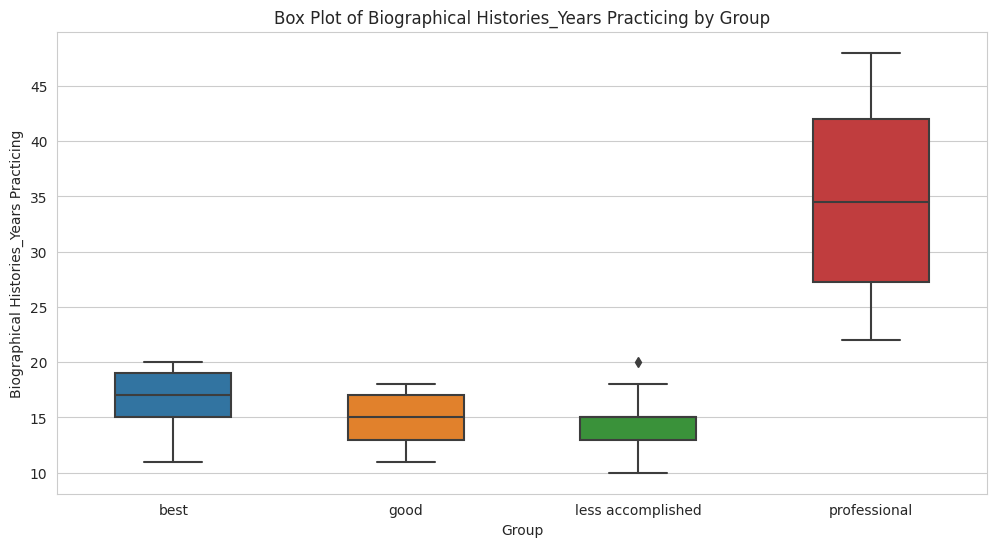

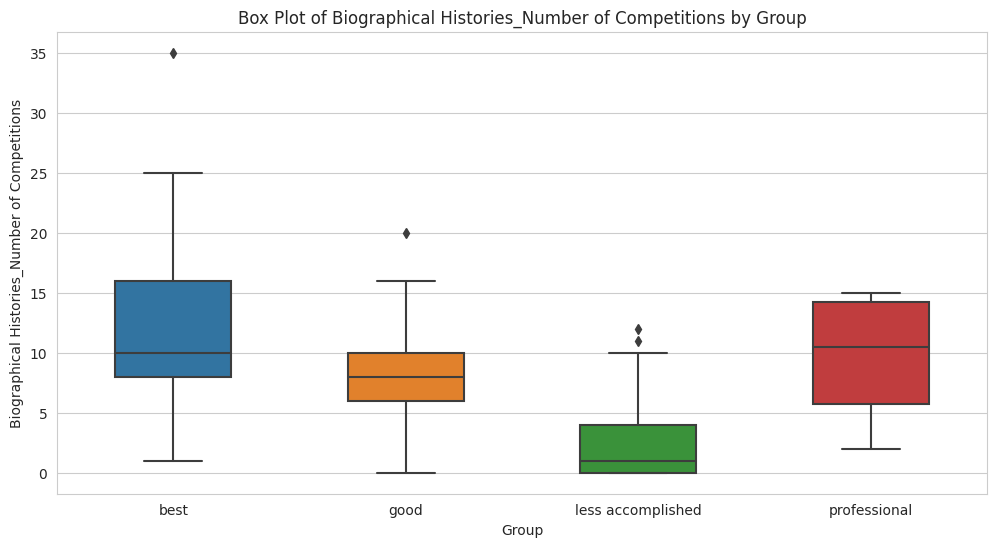

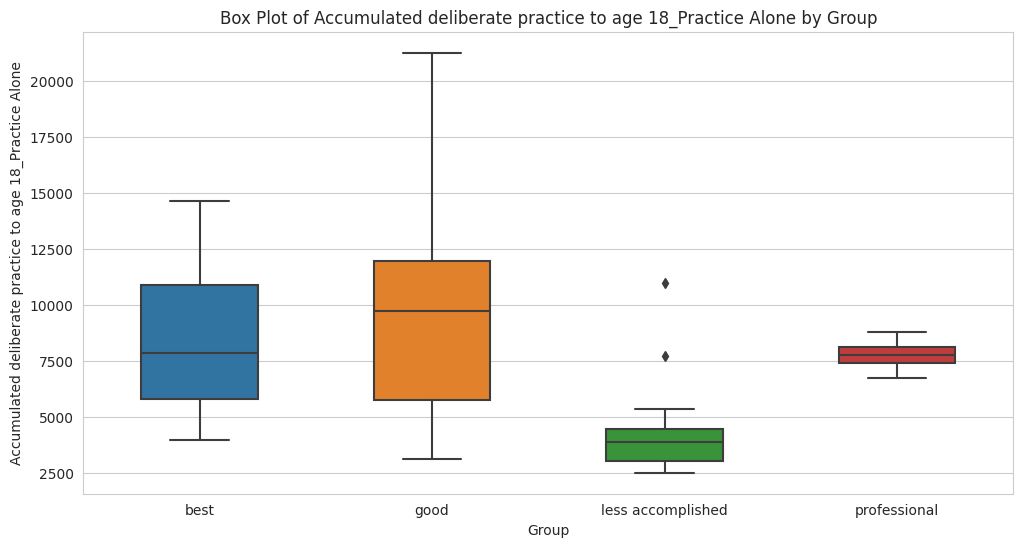

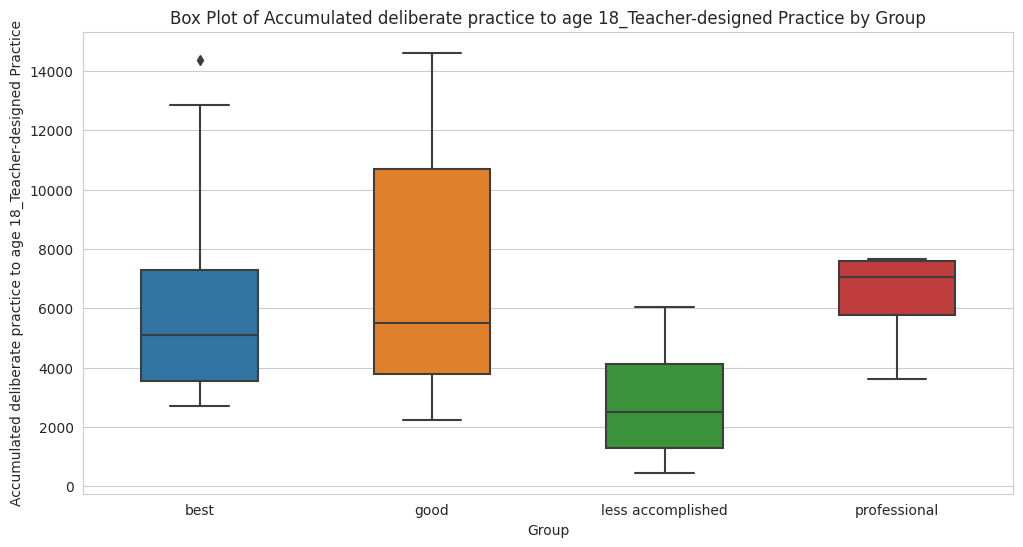

In [111]:
# List of columns to create box plots for
columns = ['age', 'Age Began Practicing Violin',
           'Biographical Histories_Age Started Violin Lessons',
           'Biographical Histories_Age Decided to Become Musician',
           'Biographical Histories_Numbers of Violin Teachers',
           'Biographical Histories_Number of Other Instruments',
           'Biographical Histories_Years Practicing',
           'Biographical Histories_Number of Competitions',
           'Accumulated deliberate practice to age 18_Practice Alone',
           'Accumulated deliberate practice to age 18_Teacher-designed Practice',
          ]

# Iterate through each column
for column in columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Creating a box plot with seaborn
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='group', y=column, data=df, width=0.5)

        # Adding labels and title
        plt.xlabel('Group')
        plt.ylabel(column)
        plt.title(f'Box Plot of {column} by Group')

        # Show plot
        plt.show()


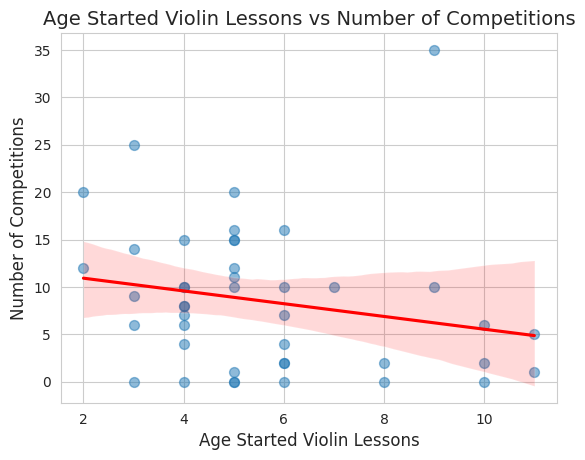

In [112]:
# Create a scatter plot with a regression line
sns.set_style("whitegrid")  # Set style to make plot more appealing
sns.regplot(data=df, x='Biographical Histories_Age Started Violin Lessons', y='Biographical Histories_Number of Competitions', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel("Age Started Violin Lessons", fontsize=12)
plt.ylabel("Number of Competitions", fontsize=12)
plt.title("Age Started Violin Lessons vs Number of Competitions", fontsize=14)

# Display plot
plt.show()

The professional and the best violinst have comparable alone practice time and teacher designed practice time at around 8000 hours of alone practice time and 6000 hours of teacher designed practice time.

The good violinst category has an average alone practice time of 10,000 hours and teacher designed of 6,500 hours.

The less accomplished volinist around 4200 hours of alone practice time and 2600 hours of designed practice time.

<ipython-input-113-bd3397b8b042>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('group')['Accumulated deliberate practice to age 18_Practice Alone', 'Accumulated deliberate practice to age 18_Teacher-designed Practice'].mean()


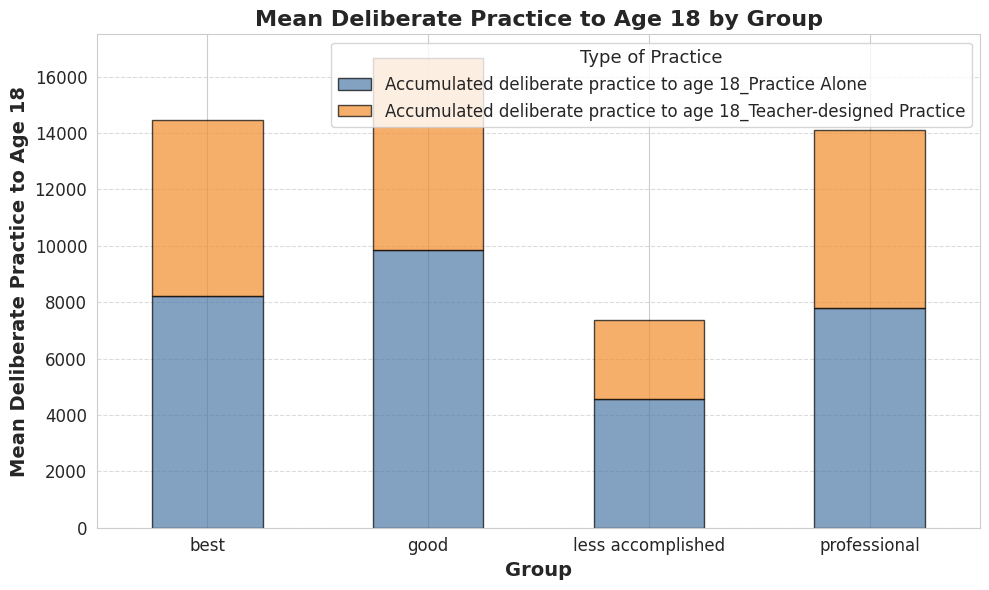

In [113]:
# Group by 'group' and calculate the mean of Practice Alone and Teacher-designed Practice
grouped = df.groupby('group')['Accumulated deliberate practice to age 18_Practice Alone', 'Accumulated deliberate practice to age 18_Teacher-designed Practice'].mean()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom colors
colors = ['#4e79a7', '#f28e2c']

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax, color=colors, alpha=0.7, edgecolor='black')

# Customize the title and labels
ax.set_xlabel("Group", fontsize=14, fontweight='bold')
ax.set_ylabel("Mean Deliberate Practice to Age 18", fontsize=14, fontweight='bold')
ax.set_title("Mean Deliberate Practice to Age 18 by Group", fontsize=16, fontweight='bold')

# Customize ticks
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend
ax.legend(title='Type of Practice', title_fontsize='13', fontsize='12', loc='upper right')

# Adjust grid and layout
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

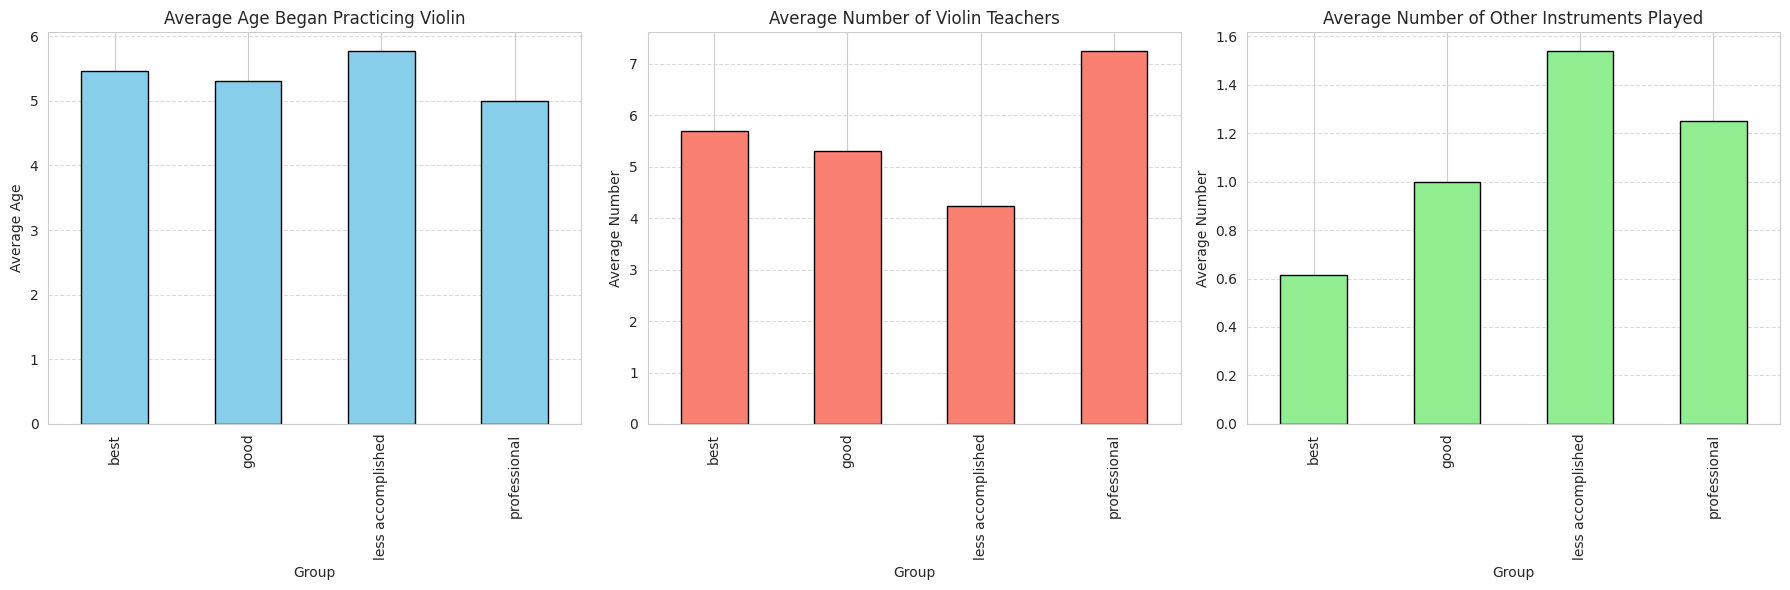

In [114]:
# Group by 'group' and calculate the mean for relevant columns
average_values = df.groupby('group').agg({
    'Age Began Practicing Violin': 'mean',
    'Biographical Histories_Numbers of Violin Teachers': 'mean',
    'Biographical Histories_Number of Other Instruments': 'mean'
})

# Plot the bar charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot average age began practicing violin by group
average_values['Age Began Practicing Violin'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Average Age Began Practicing Violin')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Average Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot average number of violin teachers by group
average_values['Biographical Histories_Numbers of Violin Teachers'].plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Average Number of Violin Teachers')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Average Number')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot average number of other instruments played by group
average_values['Biographical Histories_Number of Other Instruments'].plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Average Number of Other Instruments Played')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Average Number')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()

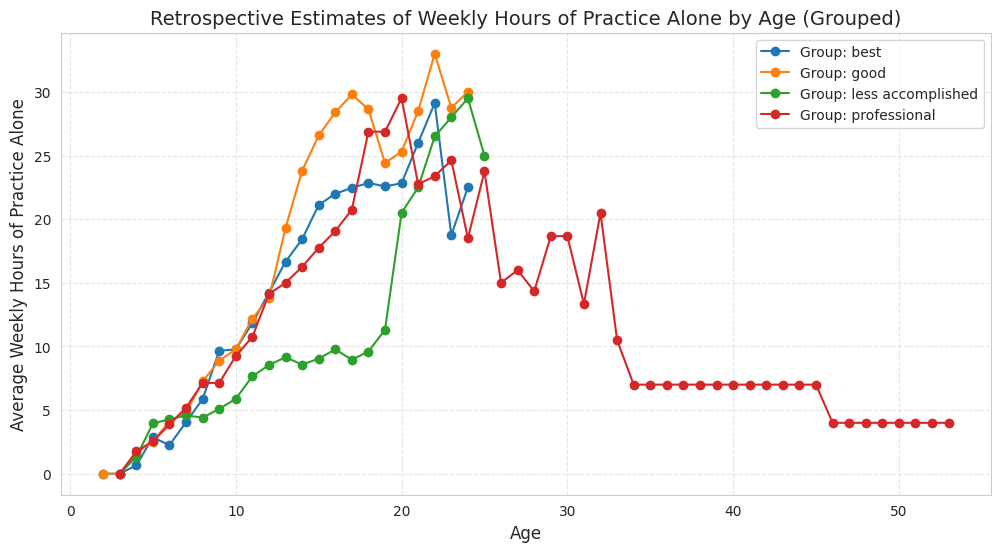

In [116]:
# The names of the relevant columns
age_columns = [f'Retrospective Estimates of Weekly Hours of Practice Alone by Age_{i}' for i in range(2, 55)]
actual_age_columns = [col for col in age_columns if col in df.columns]

# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each group in the 'group' column
for group in df['group'].unique():
    # Filter data for the current group
    data_by_age = df[df['group'] == group][actual_age_columns]

    # Calculate the average weekly hours of practice alone by age across all entries in the current group
    average_hours_by_age = data_by_age.mean(numeric_only=True)

    # Adjust the actual range of ages for plotting if necessary
    ages = range(2, 2 + len(average_hours_by_age))

    # Plot the data for the current group
    plt.plot(ages, average_hours_by_age, marker='o', label=f'Group: {group}')

# Add labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Weekly Hours of Practice Alone', fontsize=12)
plt.title('Retrospective Estimates of Weekly Hours of Practice Alone by Age (Grouped)', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Show plot
plt.show()


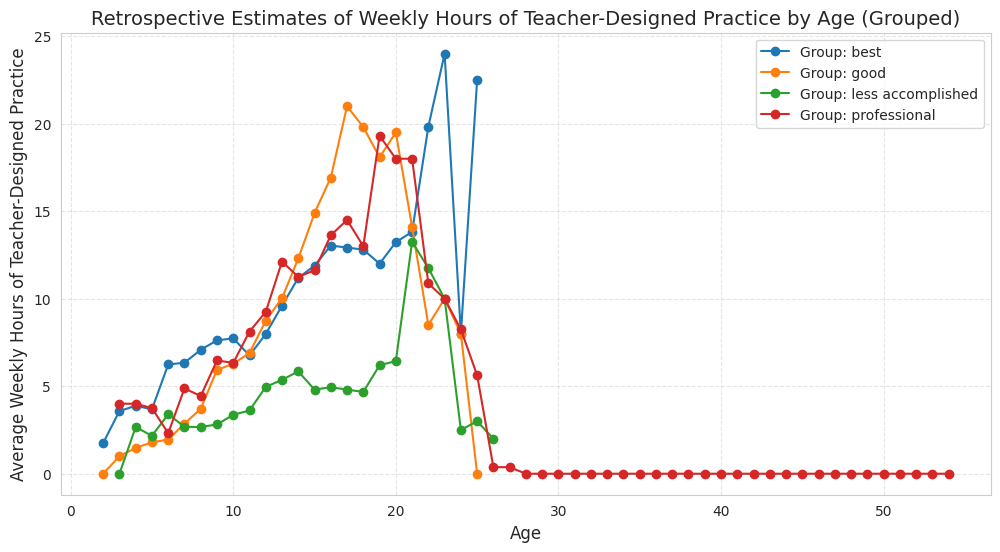

In [117]:
import matplotlib.pyplot as plt

# The names of the relevant columns
age_columns = [f'Retrospective Estimates of Weekly Hours of Teacher-Designed Practice by Age_{i}' for i in range(2, 55)]
actual_age_columns = [col for col in age_columns if col in df.columns]

# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each group in the 'group' column
for group in df['group'].unique():
    # Filter data for the current group
    data_by_age = df[df['group'] == group][actual_age_columns]

    # Calculate the average weekly hours of teacher-designed practice by age across all entries in the current group
    average_hours_by_age = data_by_age.mean(numeric_only=True)

    # Adjust the actual range of ages for plotting if necessary
    ages = range(2, 2 + len(average_hours_by_age))

    # Plot the data for the current group
    plt.plot(ages, average_hours_by_age, marker='o', label=f'Group: {group}')

# Add labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Weekly Hours of Teacher-Designed Practice', fontsize=12)
plt.title('Retrospective Estimates of Weekly Hours of Teacher-Designed Practice by Age (Grouped)', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Show plot
plt.show()


Summary:

The majority of violinst in this dataset started playing the violin by the age of six.

The age range of the best, good, less accomplished are around the age of 18-25. The professional age range is 27-54.

It should be noted this is a small sample size. There are 13 best violinst, 13 good violinist, 13 less accomplished violinist and four professional violinist in this dataset.


The best and good violinst decided to become professional volinist around the age of twelve. The less accomplished and the professional at around the age of seventeen.


The years practiced was signicantly different due to the age of the professional group. The range of years practiced in the professional group was around 24- 47 years of practiced. With the others groups averaging around 10-20 years of practice.

The best group lead the number of competition at a median of 10. The good and the prefessional group's median was 8 and 7 respectively. With the less accomplished median at 1.